### Important packages/library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### importing data from the database

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True) # tiver que excluir um colunas que nao devia está presente.
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
mini_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
mini_df.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136


### Visualizando como as caracteristicas afetam a emissão de CO2

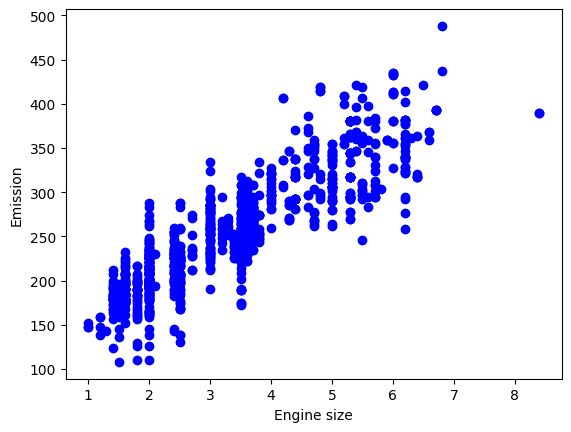

In [4]:
plt.scatter(mini_df.ENGINESIZE, mini_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

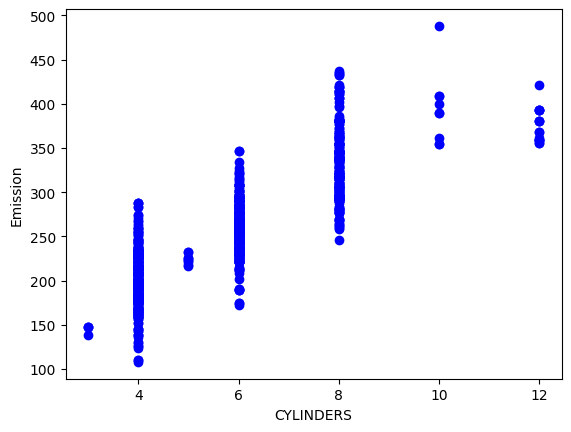

In [5]:
plt.scatter(mini_df.CYLINDERS, mini_df.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

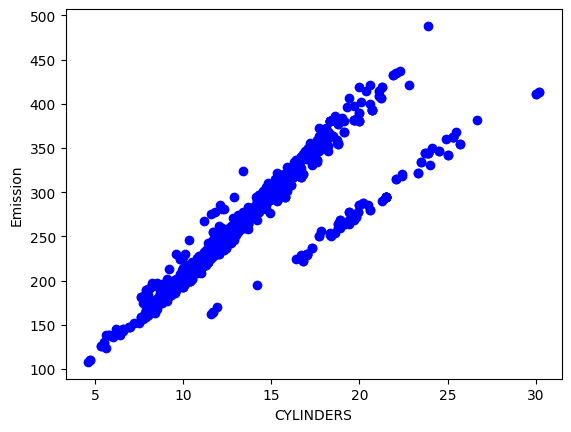

In [6]:
plt.scatter(mini_df.FUELCONSUMPTION_CITY, mini_df.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

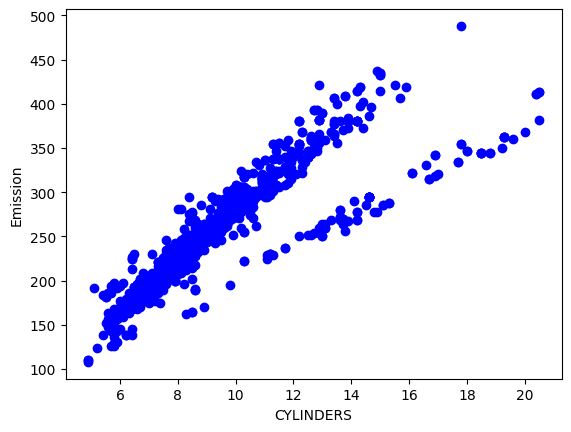

In [7]:
plt.scatter(mini_df.FUELCONSUMPTION_HWY, mini_df.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

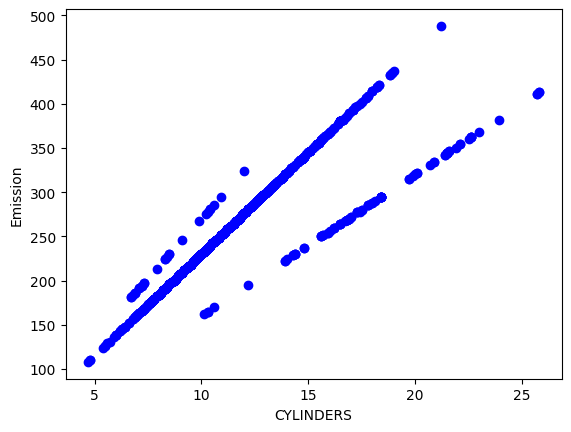

In [8]:
plt.scatter(mini_df.FUELCONSUMPTION_COMB, mini_df.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

### Creat a a train and test dataset

In [9]:
random_choice =  np.random.rand(len(mini_df)) < 0.8
# Aqui estou escolherendo uam sequencia de numero aleatorio.
# se ele for maniro que 0.8  é Verdadedo , caso contrario falso. 
random_choice[0:10]
#toda vez que executamos ele nos fornece um conjunto diferente

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True])

In [10]:
# vamos utilizar isso para escolher aleatoriamente aas linha que
# será para o treino e as que seram para o test set 
train = mini_df[random_choice]
test = mini_df[~random_choice] 
# o simbolo "" ~ "" vai inverte o que é verdade para falto
# por que, o que é falsa ele escluir da lista.

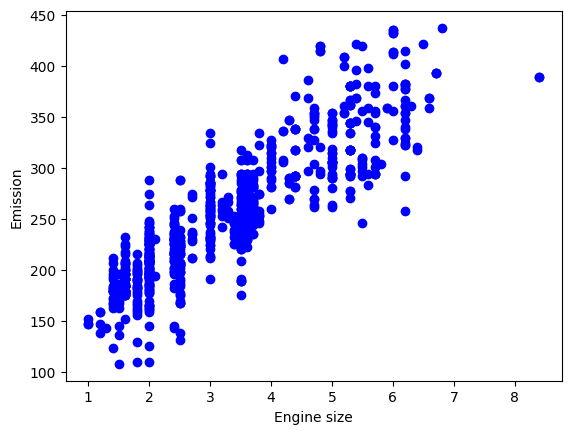

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
# plot com aspenas a parte do treino.

### Multiple Regression Model

In [12]:
# Primeiro vamos inporta a bibliooteca scikitlearn
from sklearn import linear_model
# Note que o procedimento será omesmo que da regressao linear
# apenas iremso adicional mais algumas caracteristica

## Criando um estrutura para adicionar no modelo de regressao 
Reg =  linear_model.LinearRegression()
## o metodo para encontrar os parametro é usando
# Ordinary least squares Linear Regression.
Reg

LinearRegression()

In [13]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
5,3.5,6,11.9,7.7,10.0,230


In [14]:
# Vamos pegar todos os valores das colunas que 
# tem o papael se representa as variavel independente.
x = train['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']
x

KeyError: ('ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB')

In [15]:
# note que apenas tentar  chamar as colunas não funciona 
# Ajuste:
x = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
print(x)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB
0            2.0          4                   8.5
1            2.4          4                   9.6
2            1.5          4                   5.9
3            3.5          6                  11.1
5            3.5          6                  10.0
...          ...        ...                   ...
1062         3.0          6                  11.8
1063         3.2          6                  11.5
1064         3.0          6                  11.8
1065         3.2          6                  11.3
1066         3.2          6                  12.8

[848 rows x 3 columns]


In [16]:
x_1 = np.asanyarray(x)
print(x_1)
# aqui temo apenas os numeros 
# NO curso da IBM ele sugere a segunda opção,
# Mas as duas vão fucionar

[[ 2.   4.   8.5]
 [ 2.4  4.   9.6]
 [ 1.5  4.   5.9]
 ...
 [ 3.   6.  11.8]
 [ 3.2  6.  11.3]
 [ 3.2  6.  12.8]]


In [17]:
# Vamos fazer o mesmo para a variavel dependente 
y   = train[['CO2EMISSIONS']]
#y_1 = np.asanyarray(train[['CO2EMISSIONS']])

In [18]:
# Com os valores/numeros em maos, podemos realizar o fit
# para tando devemos chamar o modelo de regressão linear 
# porque estou contruindo tudo em cima dele 
Reg.fit(x,y)
# A funnção a cima vai nos fornecer os parametros do fit 
print("Coeficentes:",Reg.coef_)
print("Coeficentes:",Reg.intercept_)
# Lembrandio que utilizamos 3 variaveis independente logo temos 
# 3 coeficiente  + 1 que é onde a reta intercepta y em x=0


Coeficentes: [[10.90145258  7.52634748  9.75925099]]
Coeficentes: [63.50787096]


In [ ]:
# Usando da outra forma
Reg.fit(x_1,y_1)
print("Coeficentes:",Reg.coef_)
print("Coeficentes:",Reg.intercept_)

### Prediction

In [19]:
# prediçao = Reg.predict()
# Vamos usar a parte que separamos para avaliar nosso modelo
x_test =  test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_test =  test[['CO2EMISSIONS']]

In [22]:
# Quero que ele faça uma predição desses valores
prediçao = Reg.predict(x_test)
prediçao[0:5]

array([[250.26910044],
       [245.38947494],
       [370.38692651],
       [214.9605262 ],
       [223.34802196]])

In [23]:
# Para avaliar a diferenã do valor predito e o valor real 
# Faremos o calculo da soma do erro residual ao quadrado.
print("Residual sum of squares: ", np.mean((prediçao - y_test)**2) );

Residual sum of squares:  CO2EMISSIONS    600.210523
dtype: float64


C:\Users\Oibug\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [24]:
y_test = np.asanyarray(y_test)
print("Residual sum of squares: ", np.mean((prediçao - y_test)**2) )

Residual sum of squares:  600.2105229769792


In [25]:
# Outro tipo de medidad é a variancia score
# No caso perfeito obtemos 1 
print('Variance score:', Reg.score(x_test, y_test))

Variance score: 0.8485429948253589
